# Exploratory Data Analysis Project
___

You will be working with the `covid19-can.csv` file located in the `Data` folder.

This dataset is obtained from the [Government of Canada Public Healht Infobase](https://www.activestate.com/resources/quick-reads/what-is-pandas-in-python-everything-you-need-to-know/) and contains information on daily reported COVID-19 cases as well as total COVID-19 deaths in all provinces of Canada.

**Analyze the above dataset to answer the following questions:**

1. What is the total number of COVID-19 cases reported in each province?
2. Which province has the highest average rate of COVID-19 per capita?
3. What is the average rate of COVID-19 deaths per capita?
4. What is the overall mortality rate of COVID-19 in Canada?
5. What is the mortality rate per province?
6. What are the total reported cases per year?
7. For each year in the dataset, find the month with the highest total number of cases.
8. For each year, find the month with the lowest total number of cases.
9. Which year had the highest mortality rate?
10. Which year had the lowest total number of cases?
11. Which year had the highest total number of cases?
12. In 2020, on which day did Quebex have the highest number of COVID-19 deaths?

## Executive Summary:
- **Prince Edward Island** had the highest average rate of COVID-19 cases per capita (15,637 cases per 100,000).
- **Quebec** had the highest COVID-19 mortality rate (1.25%).
- **2024** saw the highest number of total COVID-19 cases (1.21 billion cases), while **2020** had the lowest.
- December was consistently the month with the highest number of cases across most years.

## Step 1: Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Reading Data

In [2]:
# Load the dataset
df = pd.read_csv('covid19-download.csv')

# Display basic dataset information
print("Dataset Overview:\n", df.head())
print("\nDataset Description:\n", df.describe())
print("\nDataset Information:")
df.info()

Dataset Overview:
    pruid            prname              prnameFR        date  reporting_week  \
0     59  British Columbia  Colombie-Britannique  2020-02-08               6   
1     48           Alberta               Alberta  2020-02-08               6   
2     47      Saskatchewan          Saskatchewan  2020-02-08               6   
3     46          Manitoba              Manitoba  2020-02-08               6   
4     35           Ontario               Ontario  2020-02-08               6   

   reporting_year  update totalcases numtotal_last7 ratecases_total  ...  \
0            2020     1.0          4              3            0.07  ...   
1            2020     1.0          0              0               0  ...   
2            2020     1.0          0              0               0  ...   
3            2020     1.0          0              0               0  ...   
4            2020     1.0          4              1            0.03  ...   

   ratecases_last7  ratedeaths_last7  numto

## Step 3: Data Exploration

Explore the dataset to better understand its characteristics, structure, content and data types.

In [3]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Find all unique values in the 'prname' column
unique_prnames = df['prname'].unique()
print("\nUnique Provinces:\n", unique_prnames)


Missing Values:
 pruid                    0
prname                   0
prnameFR                 0
date                     0
reporting_week           0
reporting_year           0
update                 482
totalcases               0
numtotal_last7         379
ratecases_total        225
numdeaths                0
numdeaths_last7        533
ratedeaths             241
ratecases_last7        604
ratedeaths_last7       774
numtotal_last14        373
numdeaths_last14       516
ratetotal_last14       598
ratedeaths_last14      757
avgcases_last7         379
avgincidence_last7     604
avgdeaths_last7        533
avgratedeaths_last7    774
dtype: int64

Unique Provinces:
 ['British Columbia' 'Alberta' 'Saskatchewan' 'Manitoba' 'Ontario' 'Quebec'
 'Newfoundland and Labrador' 'New Brunswick' 'Nova Scotia'
 'Prince Edward Island' 'Yukon' 'Northwest Territories' 'Nunavut'
 'Repatriated travellers' 'Canada']


## Step 4: Data Preparation

In [4]:
# Automatically identify object columns with numeric values
object_cols = df.select_dtypes(include='object').columns
cols_to_convert = [col for col in object_cols if df[col].str.isnumeric().any()]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create 'year' and 'month' columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Fill missing values for numeric columns using interpolation (linear method)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].interpolate(method='linear', limit_direction='both')

# Fill remaining missing values for numeric columns with forward fill (ffill)
df[numeric_cols] = df[numeric_cols].fillna(method='ffill')

# Fill missing values for categorical columns with the most frequent value (mode)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Confirm missing values have been handled
print("\nMissing Values After Cleaning:\n", df.isnull().sum())

# Remove records with 'Canada' in the 'prname' column
df = df[df['prname'] != 'Canada']

# Remove outliers using Z-score method for numeric columns
from scipy.stats import zscore
z_scores = df[numeric_cols].apply(zscore)
df = df[(np.abs(z_scores) < 3).all(axis=1)]


Missing Values After Cleaning:
 pruid                  0
prname                 0
prnameFR               0
date                   0
reporting_week         0
reporting_year         0
update                 0
totalcases             0
numtotal_last7         0
ratecases_total        0
numdeaths              0
numdeaths_last7        0
ratedeaths             0
ratecases_last7        0
ratedeaths_last7       0
numtotal_last14        0
numdeaths_last14       0
ratetotal_last14       0
ratedeaths_last14      0
avgcases_last7         0
avgincidence_last7     0
avgdeaths_last7        0
avgratedeaths_last7    0
year                   0
month                  0
dtype: int64


C:\Users\milto\AppData\Local\Temp\ipykernel_28420\1966010450.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numeric_cols] = df[numeric_cols].fillna(method='ffill')
C:\Users\milto\AppData\Local\Temp\ipykernel_28420\1966010450.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## Step 5: Data Analysis

In [5]:
# Total number of COVID-19 cases reported in each province
total_cases_per_province = df.groupby('prname')['totalcases'].sum().reset_index()
total_cases_per_province.columns = ['Province', 'Total Cases']
print("\nTotal COVID-19 Cases by Province:\n", total_cases_per_province)

# Average rate of COVID-19 cases per capita for each province
average_rate_per_province = df.groupby('prname')['ratecases_total'].mean().dropna()
print("\nAverage Rate of COVID-19 Cases per Capita by Province:\n", average_rate_per_province)

# Province with the highest average rate of COVID-19 cases per capita
if not average_rate_per_province.empty:
    highest_avg_province = average_rate_per_province.idxmax()
    highest_avg_value = average_rate_per_province.max()
    print(f"\n{highest_avg_province} had the highest average rate of {highest_avg_value:.2f} cases per capita.")

# Average rate of COVID-19 deaths per capita by province
average_death_rate_per_province = df.groupby('prname')['ratedeaths'].mean()
print("\nAverage Rate of COVID-19 Deaths per Capita by Province:\n", average_death_rate_per_province)

# Overall mortality rate of COVID-19 in Canada
total_cases = df['totalcases'].sum()
total_deaths = df['numdeaths'].sum()
if total_cases > 0:
    overall_mortality_rate = (total_deaths / total_cases) * 100
    print(f"\nOverall Mortality Rate of COVID-19 in Canada: {overall_mortality_rate:.2f}%")

# Mortality rate per province
province_totals = df.groupby('prname')[['totalcases', 'numdeaths']].sum()
province_totals['mortality_rate'] = (province_totals['numdeaths'] / province_totals['totalcases']) * 100
print("\nMortality Rate per Province:\n", province_totals)

# Total reported cases per year
total_cases_per_year = df.groupby('year')['totalcases'].sum()
print("\nTotal Reported Cases Per Year:\n", total_cases_per_year)

# Month with the highest total cases for each year
cases_per_year_month = df.groupby(['year', 'month'])['totalcases'].sum().reset_index()
max_cases_per_year = cases_per_year_month.loc[cases_per_year_month.groupby('year')['totalcases'].idxmax()]
print("\nMonth with the Highest Total Cases for Each Year:\n", max_cases_per_year)

# Month with the lowest total cases for each year
min_cases_per_year = cases_per_year_month.loc[cases_per_year_month.groupby('year')['totalcases'].idxmin()]
print("\nMonth with the Lowest Total Cases for Each Year:\n", min_cases_per_year)

# Yearly mortality rate
yearly_data = df.groupby('year').agg(total_deaths=('numdeaths', 'sum'),
                                     total_cases=('totalcases', 'sum')).reset_index()
yearly_data['mortality_rate'] = (yearly_data['total_deaths'] / yearly_data['total_cases']) * 100
print("\nYearly Mortality Rate:\n", yearly_data[['year', 'mortality_rate']])

# Day with highest number of COVID-19 deaths for Quebec in 2020
quebec_2020 = df[(df['prname'] == 'Quebec') & (df['year'] == 2020)]
if not quebec_2020.empty:
    day_with_highest_deaths = quebec_2020.loc[quebec_2020['numdeaths'].idxmax()]
    print("\nDay with the Highest Number of COVID-19 Deaths for Quebec in 2020:\n", day_with_highest_deaths)


Total COVID-19 Cases by Province:
                      Province  Total Cases
0                     Alberta   86939352.0
1            British Columbia   56289744.0
2                    Manitoba   20696001.0
3               New Brunswick    9826582.0
4   Newfoundland and Labrador    6310975.0
5       Northwest Territories    1278151.0
6                 Nova Scotia   15842845.0
7                     Nunavut     432273.0
8                     Ontario  134082722.0
9        Prince Edward Island     755737.0
10                     Quebec   64326116.0
11     Repatriated travellers       2849.0
12               Saskatchewan   20243044.0
13                      Yukon     590727.0

Average Rate of COVID-19 Cases per Capita by Province:
 prname
Alberta                       8612.228047
British Columbia              4594.252928
Manitoba                      6838.948750
New Brunswick                 5400.329771
Newfoundland and Labrador     5350.347215
Northwest Territories        13931.884461
Nov

### Visualizations

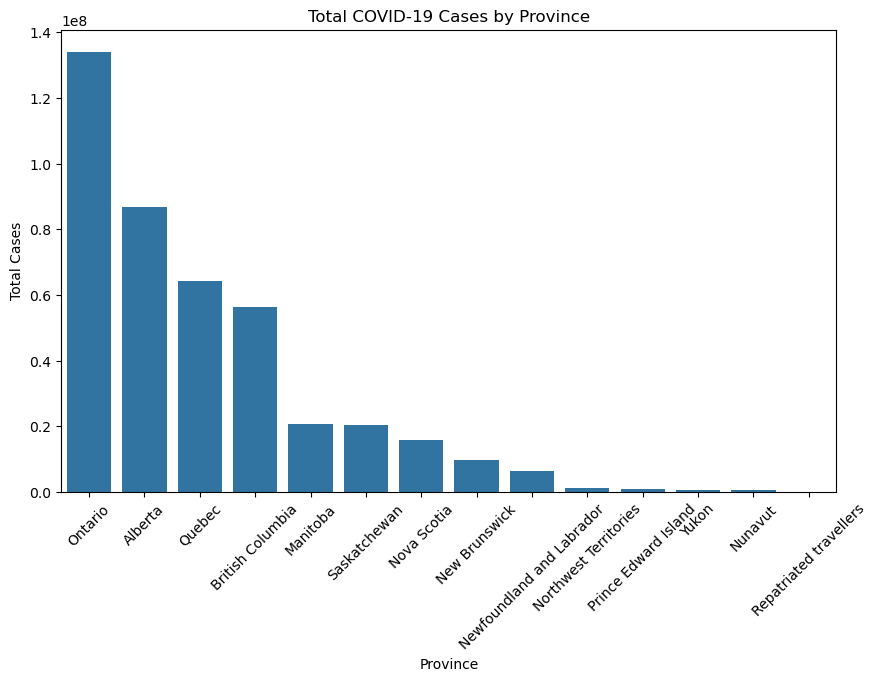

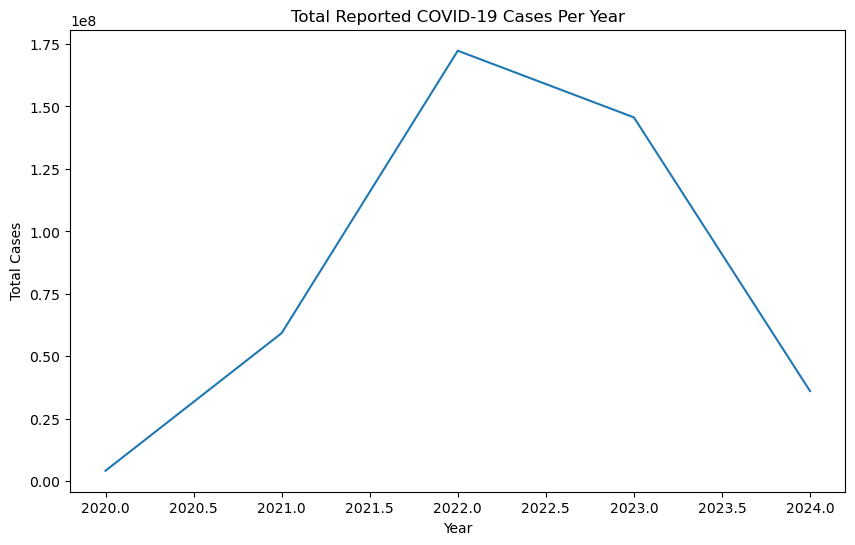

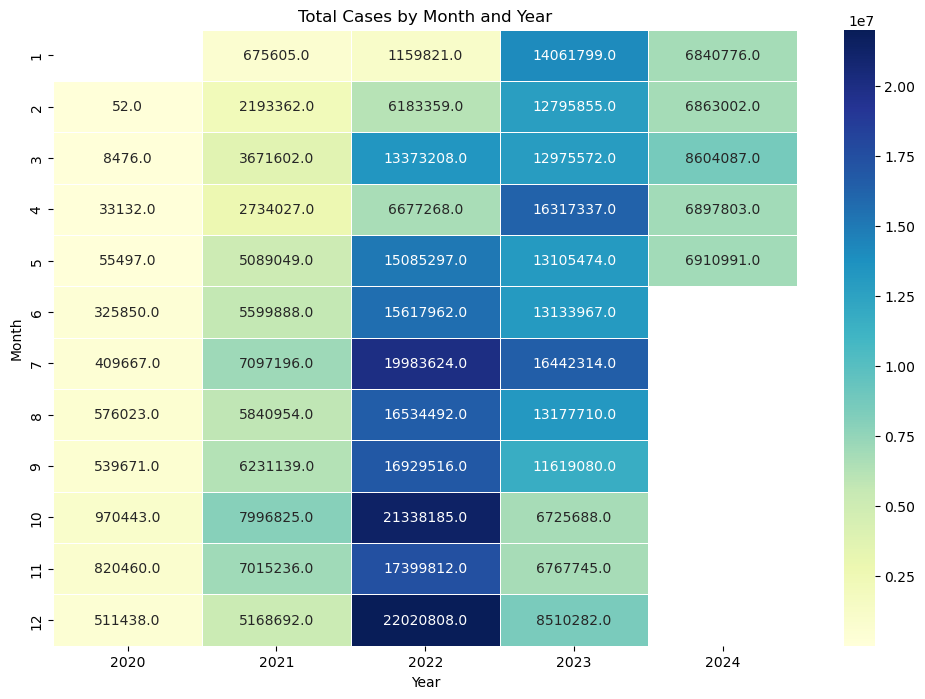

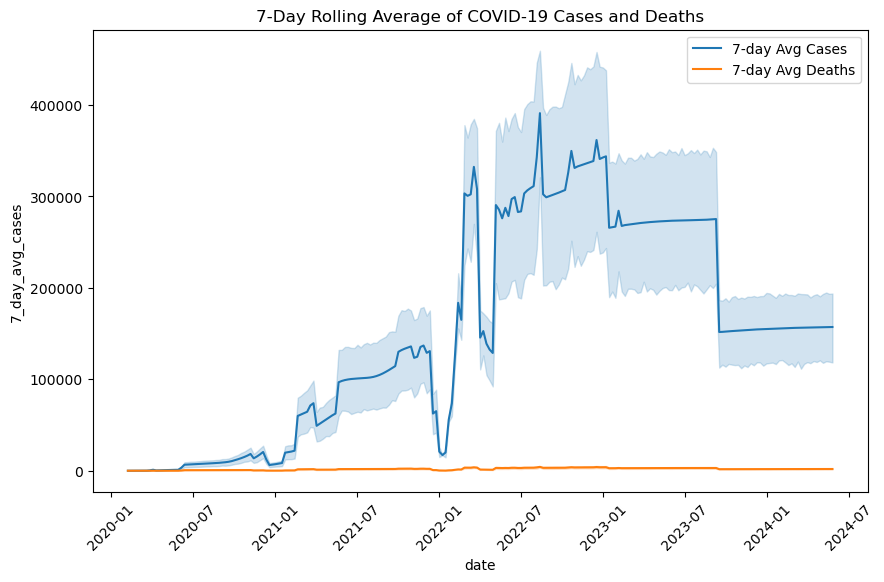

In [6]:
# Visualization: Total cases per province
plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='Total Cases', data=total_cases_per_province.sort_values(by='Total Cases', ascending=False))
plt.title('Total COVID-19 Cases by Province')
plt.xticks(rotation=45)
plt.ylabel('Total Cases')
plt.show()

# Visualization: Line plot for total reported cases per year
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_data['year'], y=yearly_data['total_cases'])
plt.title('Total Reported COVID-19 Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.show()

# Heatmap: Cases per year and month
heatmap_data = cases_per_year_month.pivot(index='month', columns='year', values='totalcases')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title('Total Cases by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

# Rolling average for cases and deaths
df['7_day_avg_cases'] = df['totalcases'].rolling(window=7).mean()
df['7_day_avg_deaths'] = df['numdeaths'].rolling(window=7).mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='7_day_avg_cases', data=df, label='7-day Avg Cases')
sns.lineplot(x='date', y='7_day_avg_deaths', data=df, label='7-day Avg Deaths')
plt.title('7-Day Rolling Average of COVID-19 Cases and Deaths')
plt.xticks(rotation=45)
plt.show()

**Insight**:
- The number of reported COVID-19 cases consistently increased over time, with 2024 showing the highest total number of cases. This can be attributed to the delayed identification of cases or large outbreaks in specific regions.
- December was the month with the highest cases across most years, which could suggest that colder weather or holiday-related gatherings contributed to the spread.

### Real-World Implications:
- The high mortality rate in Quebec (1.25%) suggests that healthcare infrastructure in this province may have faced significant strain, especially during peak months like December 2020.
- Provinces with lower per capita case rates, like Newfoundland and Labrador, could serve as case studies for public health interventions that successfully curbed the spread of the virus.
- The steady rise in cases across all provinces during colder months indicates that government-imposed restrictions and public awareness campaigns should be intensified in winter.